## Empirical PDF

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

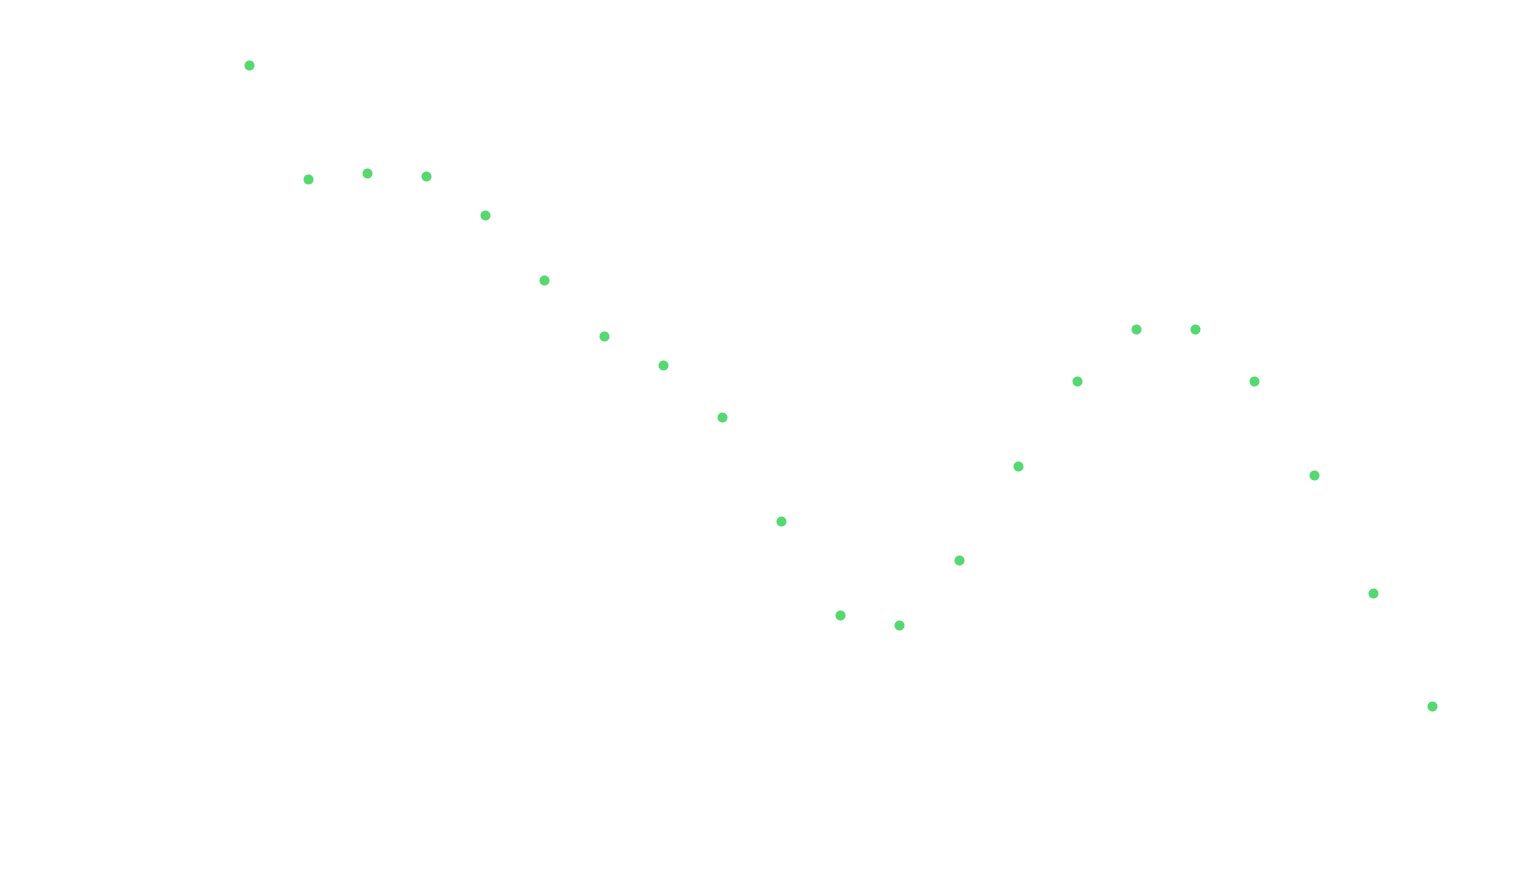

In [5]:
xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
      5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
ys = [0.2, 0.165, 0.167, 0.166, 0.154, 0.134, 0.117, 
      0.108, 0.092, 0.06, 0.031, 0.028, 0.048, 0.077, 
      0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003]

plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('Observed PDF');

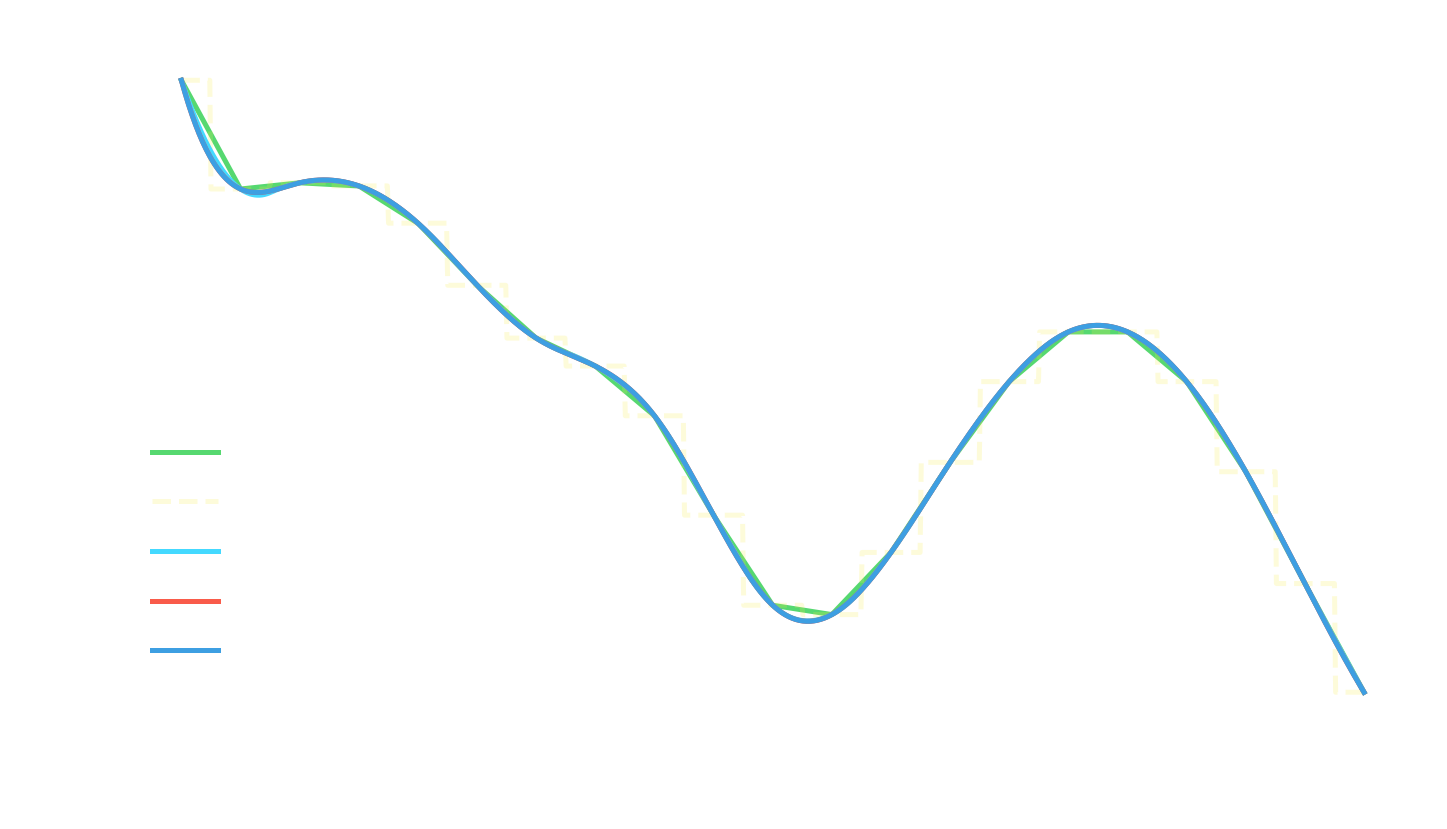

In [14]:
x = np.linspace(min(xs), max(xs), 1000)
#linear interpolation, really fast
y1 = interp1d(xs, ys)(x)
y2 = interp1d(xs, ys, kind='nearest')(x)
y3 = interp1d(xs, ys, kind='quadratic')(x)
y4 = interp1d(xs, ys, kind='cubic')(x)

from scipy.interpolate import splev, splrep
y5 = splev(x, splrep(xs, ys))

plt.scatter(xs, ys, s=30, label="Data", c='w')
plt.plot(x, y1, label='Linear (default)')
plt.plot(x, y2, label='Nearest', alpha=0.2)
plt.plot(x, y3, label='Quadratic', ls='-')
plt.plot(x, y4, label='Cubic', ls='-')
plt.plot(x, y5, label='Spline', alpha=1)
plt.legend()

**Using the `interp1d` we can now find a probability value for any `x` value.**

How can we calculate the CDF and the probability we would find a value between two bounds? Using `scipy.integrate`. Scipy to the rescue once again!

We have many options:

* `scipy.integrate.trapz` for low accuracy but high speed. Accuracy scales as O(h)
* `scipy.integrate.simps` for medium accuracy and pretty high speed. Accuracy scales as O(h^2)
* `scipy.integrate.quad` for high accuracy and low sped. Arbitrary accuracy.

There are a few more functions, look them up if you're curious.

In [20]:
from scipy.integrate import simps

# integral from a to b because we are talking about a continuous ditribution
def get_probs(xs, ys, a, b, resolution=1000): 
    x_norm = np.linspace(min(xs), max(xs), resolution)
    y_norm = interp1d(xs, ys, kind='quadratic')(x_norm)
    normalisation = simps(y_norm, x=x_norm)
    x_vals = np.linspace(a, b, resolution)
    y_vals = interp1d(xs, ys, kind="quadratic")(x_vals)
    return simps(y_vals, x=x_vals) / normalisation

def get_cdf(xs, ys, v):
    return get_probs(xs, ys, min(xs), v)

def get_sf(xs, ys, v):
    return get_probs(xs, ys, v, max(xs))
#     return 1 - get_cdf(xs, ys, v)
print(get_probs(xs, ys, 0, 10))

1.0


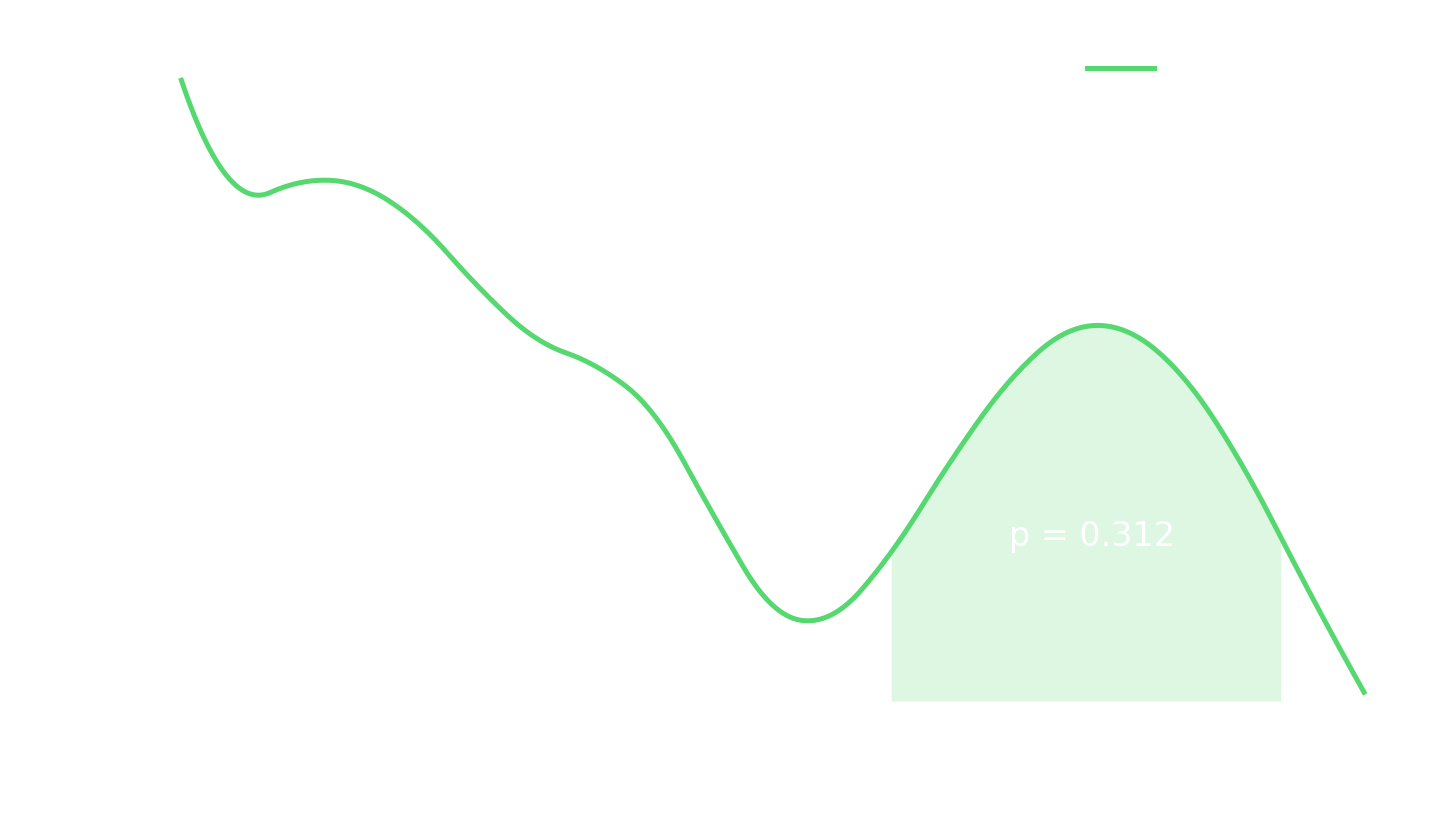

In [25]:
v1, v2 = 6, 9.3
area = get_probs(xs, ys, v1, v2)

plt.scatter(xs, ys, s=30, label='Data', color='w')
plt.plot(x, y3, linestyle='-', label='Interpolation')
plt.fill_between(x, 0, y3, where=(x>=v1)&(x<=v2), alpha=0.2)
plt.annotate(f'p = {area:.3f}', (7, 0.05)) #positioning of the text
plt.legend();


C:\Users\renat\Desktop\python-statistics\env\lib\site-packages\scipy\integrate\quadrature.py:376: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
C:\Users\renat\Desktop\python-statistics\env\lib\site-packages\scipy\integrate\quadrature.py:378: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +


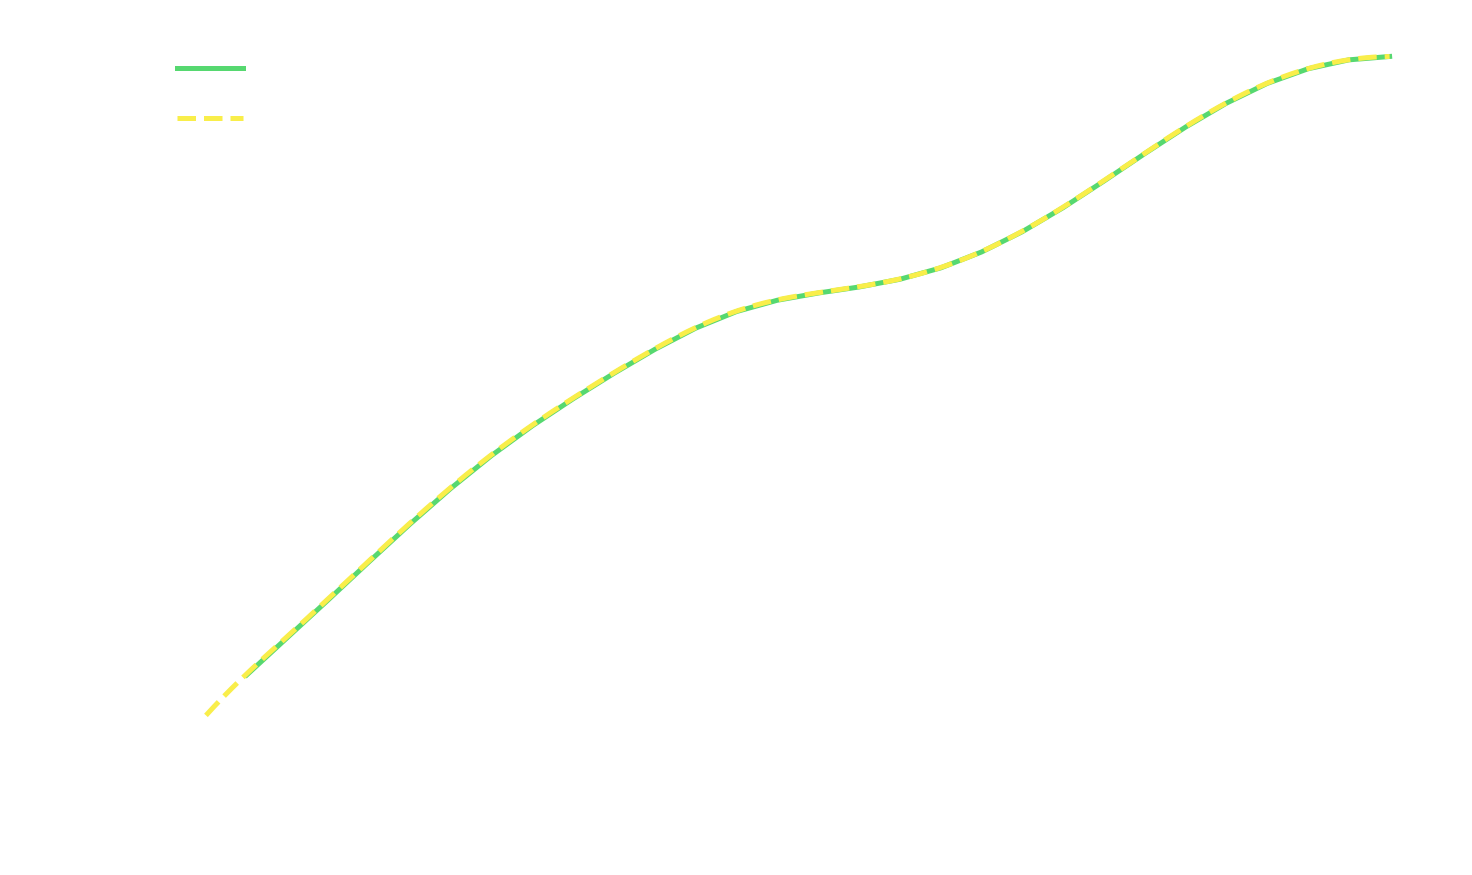

In [40]:
# Comparing CDFs

x_new = np.linspace(min(xs), max(xs), 30)
# expensive way of doing
cdf_new = [get_cdf(xs, ys, i) for i in x_new] 
# cheaper way of doing
cheap_cdf = y3.cumsum() / y3.sum() 

plt.plot(x_new, cdf_new, label="Interpolated CDF")
plt.plot(x, cheap_cdf, label="Super Cheape CDF for specific cases")
plt.ylabel('CDF')
plt.xlabel('x')
plt.legend();